## Свёрточные сети для распознавания котиков

Используем датасет [Pet Faces](https://www.soshnikov.com/permanent/data/petfaces.tar.gz) - "лица" кошек и собак, разделённые на несколько пород. Наша задача - научиться классифицировать животных по породам, и по признаку кошка/собака.

In [ ]:
!wget http://www.soshnikov.com/permanent/data/petfaces.tar.gz
!tar xfz petfaces.tar.gz

--2023-02-11 08:56:43--  http://www.soshnikov.com/permanent/data/petfaces.tar.gz
Resolving www.soshnikov.com (www.soshnikov.com)... 79.137.227.122
Connecting to www.soshnikov.com (www.soshnikov.com)|79.137.227.122|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24483412 (23M) [application/x-tar]
Saving to: ‘petfaces.tar.gz’

petfaces.tar.gz     100%[===================>]  23.35M   115KB/s    in 3m 45s  

2023-02-11 09:00:29 (106 KB/s) - ‘petfaces.tar.gz’ saved [24483412/24483412]

petfaces/cat_Abyssinian/
petfaces/cat_Bengal/
petfaces/cat_Birman/
petfaces/cat_Bombay/
petfaces/cat_British/
petfaces/cat_Egyptian/
petfaces/cat_Maine/
petfaces/cat_Persian/
petfaces/cat_Ragdoll/
petfaces/cat_Russian/
petfaces/cat_Siamese/
petfaces/cat_Sphynx/
petfaces/dog_american/
petfaces/dog_basset/
petfaces/dog_beagle/
petfaces/dog_boxer/
petfaces/dog_chihuahua/
petfaces/dog_english/
petfaces/dog_german/
petfaces/dog_great/
petfaces/dog_havanese/
petfaces/dog_japanese/
petfaces/

In [ ]:
import matplotlib.pyplot as plt 

def display_images(l):
    n=len(l)
    fig,ax = plt.subplots(1,n)
    for i,im in enumerate(l):
        ax[i].imshow(im)
        ax[i].axis('off')
    fig.set_size_inches(fig.get_size_inches()*n)
    plt.tight_layout()
    plt.show()

In [ ]:
from PIL import Image
import os
import random
import numpy as np 

size = 64

def resize(img,size,keep_aspect=True):
  if keep_aspect:
    img.thumbnail((size,size),Image.LANCZOS) 
    img = np.array(img)/255.0
    x = np.zeros((size,size,3),dtype=np.float32)
    x[:img.shape[0],:img.shape[1],:] = img
    return x
  else:
    img = img.resize((size,size),Image.LANCZOS)
    return np.array(img)/255.0

cats = []
dogs = []
for cls in os.listdir('petfaces'):
  for fn in os.listdir(f'petfaces/{cls}'):
    img = Image.open(f'petfaces/{cls}/{fn}')
    x = resize(img,size,keep_aspect=True)
    if cls.startswith('cat_'):
      cats.append(x)
    else:
      dogs.append(x)

In [ ]:
print(len(cats),len(dogs))
random.shuffle(cats)
random.shuffle(dogs)
cats = np.array(cats[:1000])
dogs = np.array(dogs[:1000])
print(cats.shape,dogs.shape)

1106 2105
(1000, 64, 64, 3) (1000, 64, 64, 3)


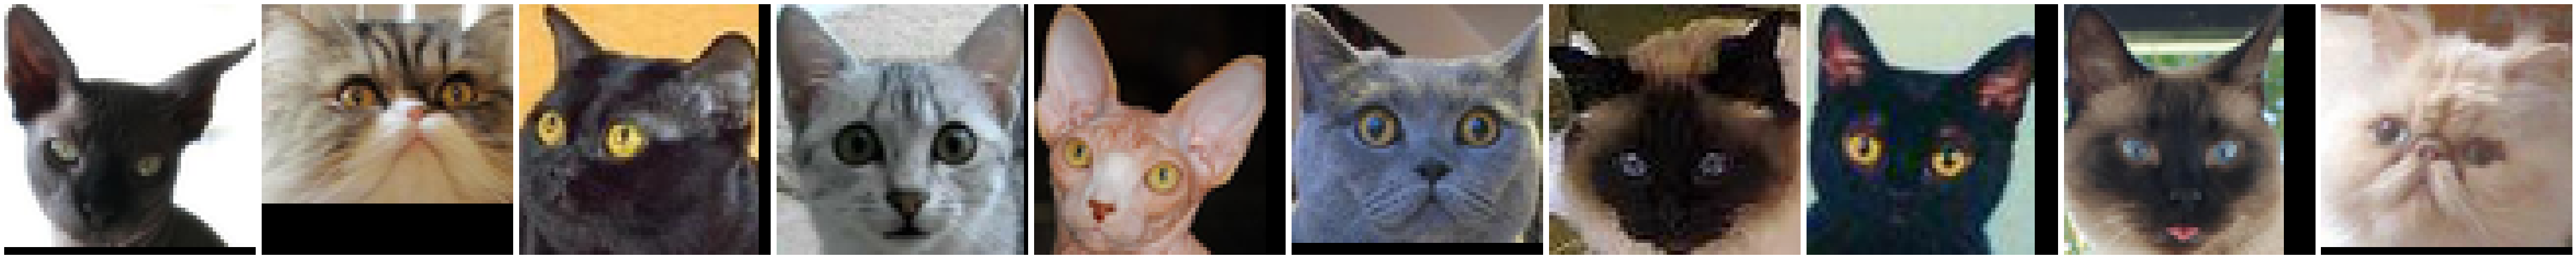

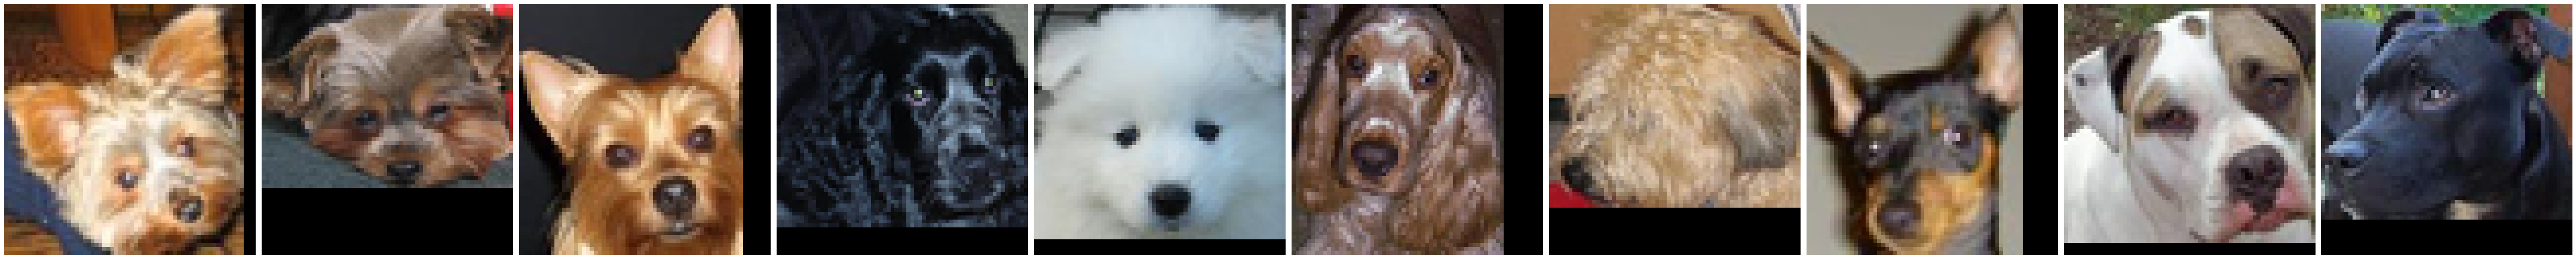

In [ ]:
display_images(cats[:10])
display_images(dogs[:10])

In [ ]:
X = np.concatenate([cats,dogs],axis=0)
Y = np.array([0] * 1000 + [1] * 1000)
X.shape,Y.shape

((2000, 64, 64, 3), (2000,))

In [ ]:
from sklearn.model_selection import train_test_split 

train_x, test_x, train_y, test_y = train_test_split(X,Y,shuffle=True,stratify=Y,test_size=0.2)

train_x.shape, train_y.shape

((1600, 64, 64, 3), (1600,))

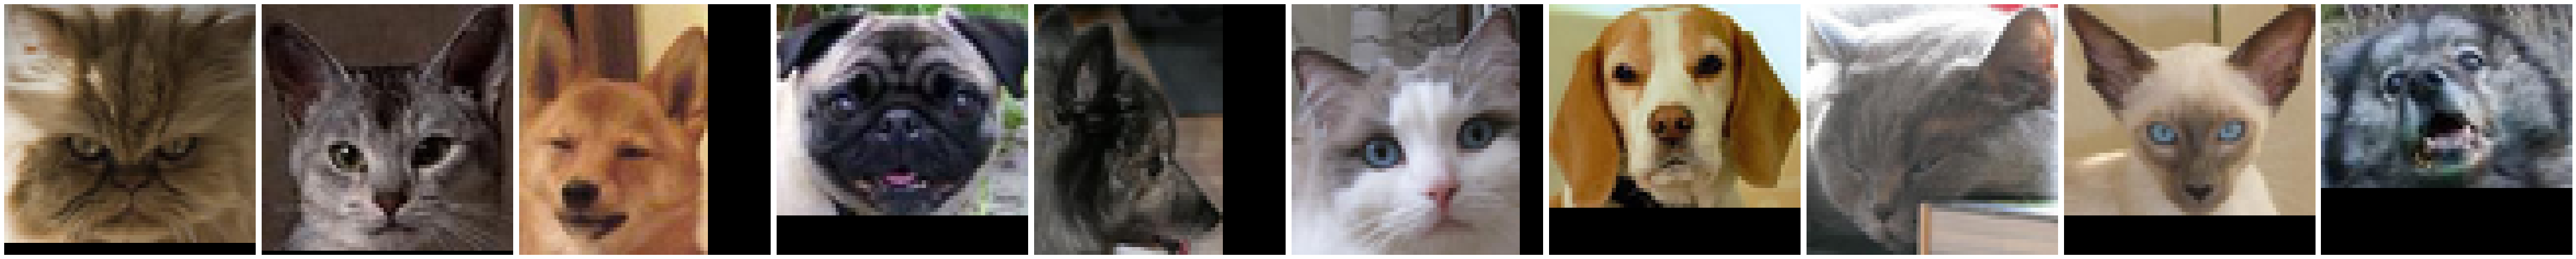

In [ ]:
display_images(train_x[:10])

In [ ]:
train_x[0]

array([[[0.5372549 , 0.50980395, 0.45490196],
        [0.52156866, 0.47058824, 0.39607844],
        [0.4745098 , 0.4       , 0.30588236],
        ...,
        [0.4       , 0.39607844, 0.38039216],
        [0.3882353 , 0.38039216, 0.3647059 ],
        [0.38039216, 0.37254903, 0.35686275]],

       [[0.5686275 , 0.5411765 , 0.49019608],
        [0.5254902 , 0.47058824, 0.4       ],
        [0.47058824, 0.39607844, 0.30588236],
        ...,
        [0.44313726, 0.41960785, 0.39607844],
        [0.43137255, 0.4117647 , 0.3882353 ],
        [0.41960785, 0.4       , 0.3764706 ]],

       [[0.59607846, 0.5686275 , 0.5254902 ],
        [0.5176471 , 0.4627451 , 0.40392157],
        [0.5137255 , 0.4392157 , 0.35686275],
        ...,
        [0.42352942, 0.38039216, 0.3372549 ],
        [0.38431373, 0.34509805, 0.3019608 ],
        [0.3647059 , 0.3254902 , 0.28627452]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [ ]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=10,kernel_size=5,activation='relu',input_shape=(64,64,3)),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=20,kernel_size=5,activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=30,kernel_size=5,activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    #keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile('adam','binary_crossentropy',['acc'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 60, 60, 10)        760       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 30, 30, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 26, 26, 20)        5020      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 13, 13, 20)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 9, 9, 30)          15030     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 4, 4, 30)        

In [ ]:
hist = model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=30)

Epoch 1/30
50/50 [==============================] - 2s 10ms/step - loss: 0.6543 - acc: 0.6381 - val_loss: 0.5471 - val_acc: 0.7375
Epoch 2/30
50/50 [==============================] - 0s 7ms/step - loss: 0.5102 - acc: 0.7725 - val_loss: 0.4636 - val_acc: 0.7625
Epoch 3/30
50/50 [==============================] - 0s 6ms/step - loss: 0.4133 - acc: 0.8313 - val_loss: 0.4138 - val_acc: 0.8200
Epoch 4/30
50/50 [==============================] - 0s 6ms/step - loss: 0.3500 - acc: 0.8438 - val_loss: 0.3573 - val_acc: 0.8450
Epoch 5/30
50/50 [==============================] - 0s 6ms/step - loss: 0.3006 - acc: 0.8712 - val_loss: 0.3203 - val_acc: 0.8725
Epoch 6/30
50/50 [==============================] - 0s 7ms/step - loss: 0.2786 - acc: 0.8819 - val_loss: 0.2989 - val_acc: 0.8675
Epoch 7/30
50/50 [==============================] - 0s 6ms/step - loss: 0.2325 - acc: 0.9031 - val_loss: 0.2648 - val_acc: 0.8925
Epoch 8/30
50/50 [==============================] - 0s 8ms/step - loss: 0.2014 - acc: 0.9

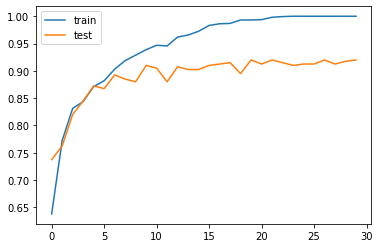

In [ ]:
plt.plot(hist.history['acc'],label='train')
plt.plot(hist.history['val_acc'],label='test')
plt.legend()

## Используем средства Keras и класиифицируем породы

In [ ]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,validation_split=0.2,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.03,
    height_shift_range=0.03,
    horizontal_flip=True,
    vertical_flip=False
    )

datagen_test = keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,validation_split=0.2)

data_train = datagen.flow_from_directory('petfaces',target_size=(size,size),subset='training')
data_test = datagen_test.flow_from_directory('petfaces',target_size=(size,size),subset='validation')

Found 2583 images belonging to 35 classes.
Found 628 images belonging to 35 classes.


In [ ]:
set.intersection(set(data_train.filenames),set(data_test.filenames))

set()

(32, 64, 64, 3) (32, 35)


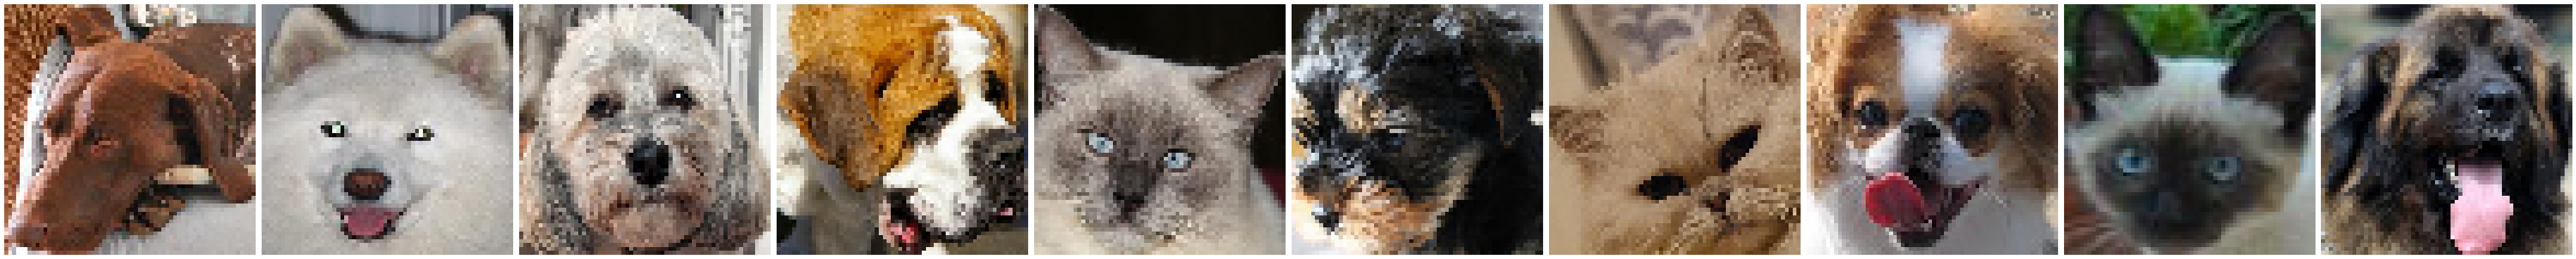

In [ ]:
for x in data_test:
  print(x[0].shape,x[1].shape)
  display_images(x[0][:10])
  break

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=10,kernel_size=5,activation='relu',input_shape=(64,64,3)),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=20,kernel_size=5,activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=30,kernel_size=5,activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(120,activation='relu'),
    keras.layers.Dense(data_train.num_classes,activation='softmax')
])

top3_acc = lambda x,y: keras.metrics.top_k_categorical_accuracy(x, y, k=3)

model.compile('adam','categorical_crossentropy',['acc',top3_acc])
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 60, 60, 10)        760       
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 30, 30, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 26, 26, 20)        5020      
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 13, 13, 20)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 9, 9, 30)          15030     
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 4, 4, 30)       

In [ ]:
hist = model.fit(data_train,validation_data=data_test,epochs=20)

Epoch 1/20
81/81 [==============================] - 8s 84ms/step - loss: 3.4965 - acc: 0.0557 - <lambda>: 0.1510 - val_loss: 3.3400 - val_acc: 0.0876 - val_<lambda>: 0.2086
Epoch 2/20
81/81 [==============================] - 8s 103ms/step - loss: 3.1468 - acc: 0.1278 - <lambda>: 0.2962 - val_loss: 2.9157 - val_acc: 0.1799 - val_<lambda>: 0.3694
Epoch 3/20
81/81 [==============================] - 6s 74ms/step - loss: 2.8089 - acc: 0.2160 - <lambda>: 0.4328 - val_loss: 2.7132 - val_acc: 0.2277 - val_<lambda>: 0.4729
Epoch 4/20
81/81 [==============================] - 7s 84ms/step - loss: 2.5833 - acc: 0.2625 - <lambda>: 0.4990 - val_loss: 2.6002 - val_acc: 0.2452 - val_<lambda>: 0.4968
Epoch 5/20
81/81 [==============================] - 6s 75ms/step - loss: 2.4178 - acc: 0.3159 - <lambda>: 0.5621 - val_loss: 2.4574 - val_acc: 0.2787 - val_<lambda>: 0.5414
Epoch 6/20
81/81 [==============================] - 7s 91ms/step - loss: 2.2562 - acc: 0.3500 - <lambda>: 0.6032 - val_loss: 2.3268 - 

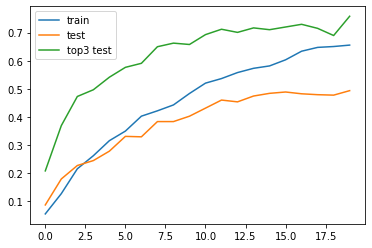

In [ ]:
plt.plot(hist.history['acc'],label='train')
plt.plot(hist.history['val_acc'],label='test')
plt.plot(hist.history['val_<lambda>'],label='top3 test')
plt.legend()

In [ ]:
Y = []
X = []
for x in data_test:
  X.extend(x[0])
  Y.extend(x[1])
  if x[1].shape[0]<32:
    break

X=np.array(X)
Y=np.array(Y)
print(X.shape,Y.shape)

(628, 64, 64, 3) (628, 35)


In [ ]:
p = model.predict(X)

20/20 [==============================] - 0s 3ms/step


In [ ]:
p.shape

(628, 35)

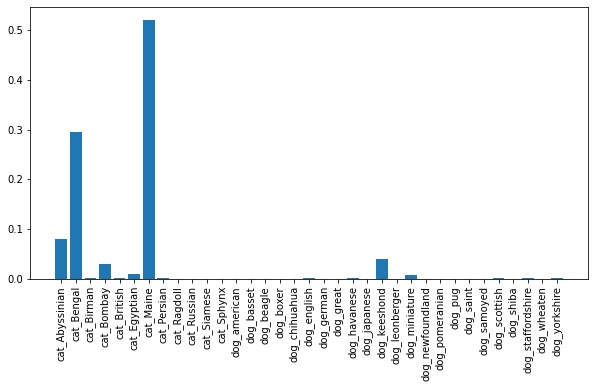

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(range(35),p[0])
plt.xticks(range(35),list(data_test.class_indices.keys()),rotation=90)
plt.show()

In [ ]:
pred = np.argmax(p,axis=1)
pred

array([ 6,  0,  9, 24,  2, 10, 11,  3, 12,  1, 34, 25, 33, 17, 20, 15, 34,
       17,  7, 11, 17,  7, 26, 10, 17, 17, 24, 18, 12, 17, 28, 23,  0,  2,
       24, 19, 26,  3, 17,  4, 27, 20, 12,  0, 22, 34, 12,  0, 13, 11,  6,
       19, 16, 25, 25, 12, 20, 23,  8,  5, 21,  9,  2, 29, 21,  5, 15, 22,
        1, 17, 19, 19, 28,  9, 20,  0,  9,  9,  3,  3, 21, 26, 28,  0, 25,
       20, 15, 34, 28, 31,  3,  8, 25,  7,  5, 27, 34, 22, 21, 22,  5,  3,
       15, 15, 22,  3, 12,  7,  1,  8,  1,  5,  4, 21, 10,  8, 21, 13,  6,
       23,  1, 12,  8, 23, 29, 28, 23, 17, 32, 20, 29, 19,  6, 23, 15,  8,
       26, 17, 12, 15, 12, 10,  9, 33, 17, 15,  1, 34,  5,  1, 15, 13, 11,
       27, 26, 17, 11,  3, 33,  3,  2, 21,  4,  2, 27, 10, 25, 27, 20, 28,
       10, 10, 28,  9, 21,  0, 20, 10, 17, 23, 15, 12,  4, 25, 17, 33, 28,
        7, 19,  9, 21, 19, 25, 31, 12, 11, 12,  0,  9,  5, 22, 17, 22,  9,
       22, 22, 27,  8, 12,  0, 24, 17,  0,  1, 28,  9, 17,  5, 15,  4, 28,
       13, 15, 11, 12, 21

In [ ]:
np.argmax(Y,axis=1)

array([ 6,  0, 17, 16,  2,  2,  0,  3, 17,  6, 16, 18, 33, 17, 20, 23, 34,
       12,  0, 11, 17,  7, 26, 10, 14, 17, 11, 13, 12, 25, 15, 15,  0,  2,
       24, 19, 26, 23, 12,  4, 27, 20, 18,  0, 22,  6, 28,  1, 13, 11,  1,
       16,  5, 25, 25, 32, 17, 34, 34,  0, 25,  9,  2, 29, 20,  5, 15, 11,
        1, 33, 19, 12, 28,  9, 23,  0, 26,  9,  3,  3, 21,  9, 11,  1, 17,
       20, 15, 34, 28, 31, 30,  8, 22,  7,  5, 27, 26, 22, 20, 29, 11,  3,
       18, 15, 22,  3,  8,  8,  5,  8,  1, 11,  4, 18,  8,  8, 25, 13,  8,
       18,  4, 14,  2, 23, 29, 21, 23, 12, 15, 12, 29, 19, 31, 23, 12, 30,
       31, 14, 31, 15, 12, 10,  4, 30, 12, 15,  1, 19,  5,  6, 23, 13,  9,
       17, 26, 13, 24,  3, 19,  3,  2, 16,  4,  2,  8, 24, 25, 27, 11, 17,
       10, 10, 28,  9, 21,  0, 20,  2, 17, 25, 17, 12,  4, 23, 17, 30, 15,
        7, 19,  9, 21, 19, 30, 31, 32, 11, 14,  0,  5,  5, 26, 34, 34,  9,
       22, 22, 16,  8, 33,  0, 17, 18,  6,  1, 28,  9, 14, 34, 27,  4, 15,
       13, 27, 16, 32, 21

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text major ticklabel objects>)

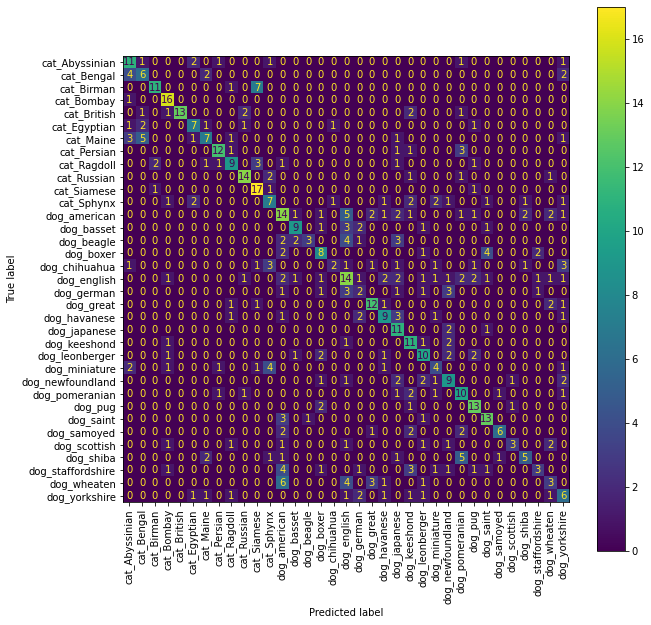

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
fig,ax = plt.subplots(figsize=(10,10))
ConfusionMatrixDisplay.from_predictions(np.argmax(Y,axis=1),pred,ax=ax,display_labels=data_test.class_indices.keys())
plt.xticks(rotation=90)

In [ ]:
!wget https://www.goodfreephotos.com/albums/animals/mammals/cat-face-portrait.jpg

--2023-02-11 11:21:45--  https://www.goodfreephotos.com/albums/animals/mammals/cat-face-portrait.jpg
Resolving www.goodfreephotos.com (www.goodfreephotos.com)... 104.193.110.200
Connecting to www.goodfreephotos.com (www.goodfreephotos.com)|104.193.110.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2718051 (2.6M) [image/jpeg]
Saving to: ‘cat-face-portrait.jpg’

cat-face-portrait.j 100%[===================>]   2.59M  1.61MB/s    in 1.6s    

2023-02-11 11:21:48 (1.61 MB/s) - ‘cat-face-portrait.jpg’ saved [2718051/2718051]



In [ ]:
!wget https://www.nj.com/resizer/ybTnvE3Xy9pUp3BbWU5bjDdSYhI=/1280x0/smart/advancelocal-adapter-image-uploads.s3.amazonaws.com/image.nj.com/home/njo-media/width2048/img/somerset_impact/photo/24407071-large.jpg

--2023-02-11 11:33:00--  https://www.nj.com/resizer/ybTnvE3Xy9pUp3BbWU5bjDdSYhI=/1280x0/smart/advancelocal-adapter-image-uploads.s3.amazonaws.com/image.nj.com/home/njo-media/width2048/img/somerset_impact/photo/24407071-large.jpg
Resolving www.nj.com (www.nj.com)... 23.202.33.81, 23.202.33.32, 2600:1417:3f::b81b:7b82, ...
Connecting to www.nj.com (www.nj.com)|23.202.33.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 122670 (120K) [image/jpeg]
Saving to: ‘24407071-large.jpg’

24407071-large.jpg  100%[===================>] 119.79K   260KB/s    in 0.5s    

2023-02-11 11:33:01 (260 KB/s) - ‘24407071-large.jpg’ saved [122670/122670]



In [ ]:
img = Image.open('24407071-large.jpg')
img.size

(1280, 1108)

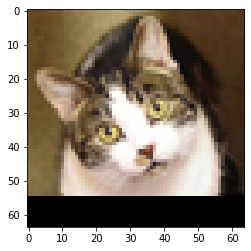

In [ ]:
img = resize(img,64,keep_aspect=True)
plt.imshow(img)

In [ ]:
p = model.predict(np.expand_dims(img,0))

1/1 [==============================] - 0s 23ms/step


In [ ]:
p

array([[2.02907049e-05, 2.87130806e-05, 2.72113772e-04, 1.49290952e-06,
        1.72981217e-05, 1.62788399e-03, 1.05308113e-03, 1.88871695e-07,
        2.10650384e-01, 6.06133696e-03, 1.51038065e-03, 1.79631002e-02,
        2.30075512e-02, 6.02940749e-03, 6.68630898e-02, 2.21731118e-03,
        1.48712401e-03, 6.28955364e-02, 1.56526148e-01, 3.55950161e-03,
        2.21374691e-01, 2.87184608e-04, 2.35522203e-02, 6.98459844e-05,
        3.70832335e-04, 1.74948352e-03, 6.45950058e-05, 4.51634442e-05,
        6.04049535e-03, 4.59059720e-06, 2.91135325e-03, 2.60947794e-02,
        4.57333513e-02, 1.07859656e-01, 2.04976858e-03]], dtype=float32)

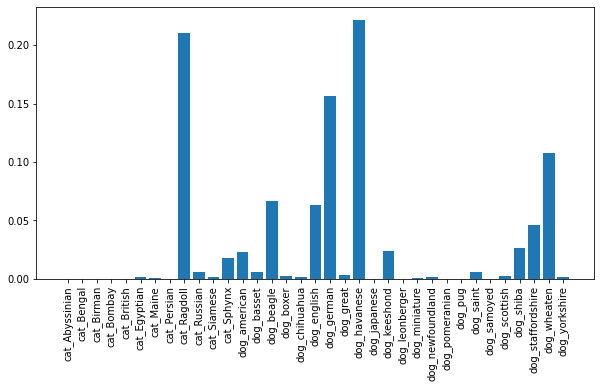

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(range(35),p[0])
plt.xticks(range(35),list(data_test.class_indices.keys()),rotation=90)
plt.show()